In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import f1_score, precision_score, recall_score

In [9]:
data = pd.read_csv('TripData.csv')

In [10]:
data.head()

,Duration,Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member type
0,679,2018-05-01 00:00:00,2018-05-01 00:11:19,31302,Wisconsin Ave & Newark St NW,31307,3000 Connecticut Ave NW / National Zoo,W22771,Member
1,578,2018-05-01 00:00:20,2018-05-01 00:09:59,31232,7th & F St NW / National Portrait Gallery,31609,Maine Ave & 7th St SW,W21320,Casual
2,580,2018-05-01 00:00:28,2018-05-01 00:10:09,31232,7th & F St NW / National Portrait Gallery,31609,Maine Ave & 7th St SW,W20863,Casual
3,606,2018-05-01 00:01:22,2018-05-01 00:11:29,31104,Adams Mill & Columbia Rd NW,31509,New Jersey Ave & R St NW,W00822,Member
4,582,2018-05-01 00:04:52,2018-05-01 00:14:34,31129,15th St & Pennsylvania Ave NW/Pershing Park,31118,3rd & Elm St NW,W21846,Member


In [11]:
data.describe()

,Duration,Start station number,End station number
count,374115.000000,374115.000000,374115.000000
mean,1261.837144,31321.624460,31322.260757
std,2423.195856,220.156373,217.183046
min,60.000000,31000.000000,31000.000000
25%,441.000000,31208.000000,31212.000000
50%,769.000000,31258.000000,31257.000000
75%,1322.000000,31500.000000,31408.000000
max,86181.000000,32227.000000,32227.000000


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374115 entries, 0 to 374114
Data columns (total 9 columns):
Duration                374115 non-null int64
Start date              374115 non-null object
End date                374115 non-null object
Start station number    374115 non-null int64
Start station           374115 non-null object
End station number      374115 non-null int64
End station             374115 non-null object
Bike number             374115 non-null object
Member type             374115 non-null object
dtypes: int64(3), object(6)
memory usage: 25.7+ MB


In [13]:
print(len(data))
data['Member type'].value_counts()

374115


Member    271812
Casual    102303
Name: Member type, dtype: int64

In [14]:
#Remove rows where y is unknown
data = data[data['Member type'] != 'Unknown']
data['Member type'].value_counts()

Member    271812
Casual    102303
Name: Member type, dtype: int64

In [15]:
x,y = data['Duration'], data['Member type']

y[ y == 'Member' ] = 1
y[ y == 'Casual' ] = 0

/Users/rumilahiri/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/rumilahiri/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [16]:
x = np.asarray(x)
y = np.asarray(y)
y = y.astype('int')

In [17]:
total = len(x)

train_per = 0.7
train_size = int(train_per*total)

print('Train Size: %d' % train_size)
print('Test Size : %d' % int(total-train_size) )

x_train = x[:train_size]
y_train = y[:train_size]

x_test = x[train_size:]
y_test = y[train_size:]

Train Size: 261880
Test Size : 112235


In [18]:
print('Member Duration')
print('min: %f' % np.min(data[ data['Member type'] == 'Member' ]['Duration']))
print('max: %f' % np.max(data[ data['Member type'] == 'Member' ]['Duration']))
print('mean: %f' % np.mean(data[ data['Member type'] == 'Member' ]['Duration']))
print('std: %f' % np.std(data[ data['Member type'] == 'Member' ]['Duration']))

print()

print('Casual Duration')
print('min: %f' % np.min(data[ data['Member type'] == 'Casual' ]['Duration']))
print('max: %f' % np.max(data[ data['Member type'] == 'Casual' ]['Duration']))
print('mean: %f' % np.mean(data[ data['Member type'] == 'Casual' ]['Duration']))
print('std: %f' % np.std(data[ data['Member type'] == 'Casual' ]['Duration']))


Member Duration
min: nan
max: nan
mean: nan
std: nan

Casual Duration
min: nan
max: nan
mean: nan
std: nan


(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

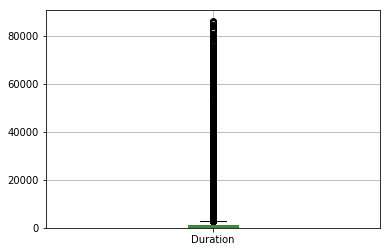

In [19]:
data.boxplot(column='Duration')
plt.hist(data[ data['Member type'] == 'Member' ]['Duration'])

In [20]:
scaler = StandardScaler()
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

#y_train = np.expand_dims(y_train, axis=-1)
#y_test = np.expand_dims(y_test, axis=-1)

In [21]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

print(np.min(x_train))
print(np.max(x_train))

print(np.min(x_test))
print(np.max(x_test))

-0.49996351519471827
36.67628574394267
-0.49996351519471827
36.89644083977259


/Users/rumilahiri/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/rumilahiri/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/rumilahiri/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [22]:
model = LogisticRegression()
model.fit(x_train,y_train)

/Users/rumilahiri/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [23]:
y_pred = model.predict(x_test)
print('F1 Score : %f' % f1_score(y_test,y_pred))
print('Precision: %f' % precision_score(y_test,y_pred))
print('Recall   : %f' % recall_score(y_test,y_pred))

F1 Score : 0.845916
Precision: 0.747993
Recall   : 0.973339


In [24]:
model = DecisionTreeClassifier()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
print('F1 Score : %f' % f1_score(y_test,y_pred))
print('Precision: %f' % precision_score(y_test,y_pred))
print('Recall   : %f' % recall_score(y_test,y_pred))

F1 Score : 0.846562
Precision: 0.778240
Recall   : 0.928034


In [25]:
model = RandomForestClassifier()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
print('F1 Score : %f' % f1_score(y_test,y_pred))
print('Precision: %f' % precision_score(y_test,y_pred))
print('Recall   : %f' % recall_score(y_test,y_pred))

/Users/rumilahiri/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


F1 Score : 0.845382
Precision: 0.775114
Recall   : 0.929661


In [ ]:
model = SVC()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
print('F1 Score : %f' % f1_score(y_test,y_pred))
print('Precision: %f' % precision_score(y_test,y_pred))
print('Recall   : %f' % recall_score(y_test,y_pred))